In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

**PROCESSING AND VISUALIZATION OF REVIEWS DATA**

In [ ]:
df=pd.read_table('/content/Restaurant_Reviews.tsv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


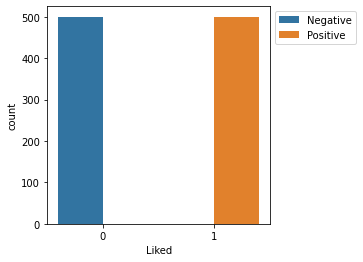

In [ ]:
plt.figure(figsize=(4,4)) # Visualization of the number of positive and negative reviews
c=sn.countplot(x='Liked',hue='Liked',data=df)
legend_labels, _= c.get_legend_handles_labels()
c.legend(legend_labels, ['Negative','Positive'], bbox_to_anchor=(1,1))
plt.show()

In [ ]:
x=df['Review'].values
y=df['Liked'].values

In [ ]:
df['Liked'].value_counts() # Finding the number of positive and negative reviews

1    500
0    500
Name: Liked, dtype: int64

TRAIN TEST SPLIT OF THE REVIEW DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.14,random_state=33)

In [ ]:
x_train.shape


(860,)

In [ ]:
x_test.shape

(140,)

In [ ]:
y_train.shape

(860,)

In [ ]:

y_test.shape

(140,)

APPLYING THE COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

APPLYING THE ML ALGORITHM SVC TO FIT AND PREDICT

In [ ]:
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train_vect,y_train)
y_pred1=model1.predict(x_test_vect)
y_pred1

FINDING THE ACCURACY OF THE SVC MODEL

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8285714285714286

APPLYING THE PIPELINE USING VECTORIZATION MODEL AND SVC ML MODEL

In [ ]:
from sklearn.pipeline import make_pipeline

model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

FINDING THE ACCURACY OF PIPELINE USING VECTORIZATION MODEL AND SVC ML MODEL

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.8

APPLYING NAIVE BAYES ML MODEL

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(x_train_vect,y_train)
y_pred3=model3.predict(x_test_vect)
y_pred3

FINDING THE ACCURACY OF THE NAIVE BAYES ML MODEL

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.8071428571428572

APPLYING THE PIPELINE USING VECTORIZATION MODEL AND NAIVE BAYES ML MODEL



In [ ]:
from sklearn.pipeline import make_pipeline

model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4

FINDING THE ACCURACY OF PIPELINE USING VECTORIZATION MODEL AND NAIVE BAYES ML MODEL

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.85

In [ ]:
#SVC---0.8285714285714286
#SVC pipeline---0.8
#Multinomial---0.8071428571428572
#Multinomial pipeline--0.85


Hence, from the above data we got to know that Pipeline using Vectorization model and MultinomialNB has the highest accuracy score, therefore it is the best model 

In [ ]:
import joblib
joblib.dump(model4,'Positive-Negative') # create a file for the best model to be used

['Positive-Negative']

In [ ]:
import joblib
text_model=joblib.load('Positive-Negative')  # reloading the created joblib model for predictions
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
text_model.predict(['I loved it']) # we are using the joblib model to predict the output

array([1])

**SENTIMENT ANALYSIS**

In [ ]:
'''
SENTIMENT ANALYSIS:-

 * It is an NLP(Natural Language Processing) technique which is used to check 
   about the nature of the data i.e whether the data is 
   positive,negative or neutral.

* It is also known as Opinion Mining.

* In simple terms, sentiment analysis is basically a technique to analyze 
  opinions,sentiments and perceptions of users through text.

* It has a big role in businesses. For a business to grow efficently they need
  to understand what the customers want so that on the basis of their feedback
  they will improve their products and services.

BENEFITS OF SENTIMENT ANALYSIS:-

1) It provides user feedback which allow to improve the product
2) It helps in finding the happy customers easily and the customers to avoid.
3) It can help in training chatbox(if any in the website) to recognise customer
  mood and respond accordingly.

TYPE OF SENTIMENT ANALYSIS:-

1)Standard Sentiment Analysis: 
   * It determines the nature of a written text and classify it as positive,
     negative or neutral
2)Fine-Grained Sentiment Analysis:
   *It renders a more precise feedback of the customers/users in the 
    range of 1-5 star.
3)Aspect-Based Sentiment Analysis:
   *It divides the text data and defines its sentiments on the basis 
    of its aspects.

LIMITATIONS OF SENTIMENT ANALYSIS:-

1) Fail to recognise sentences having ambiguity.
2) Face difficulty in determing the sentiments of sentences taken out of context
3) Failing in finding the sentiments of sentences having irony and sarcasm 
   in them.

'''

**TWITTER SENTIMENTS**

In [ ]:
'''
TWITTER SENTIMENTS:-

 * Twitter sentiment analysis is a analysing techinque to identify and
   classify the sentiments that are expressed in the text source on twitter.

 * It allows in keeping an eye on comments about products or services of 
   a specific company on twitter.
 
 * Helps in recognising angry customers or negative mentions on twitter quickly.

ALGORITHMS IN TWITTER SENTIMENT:-
 Natural Language Processing (NLP) algorithms like Naive Bayes and
 SVM (Sentiment Vector Machine) is used in determining or predicting
 the polarity of sentences.

APPLICATIONS OF TWITTER SENTIMENTS:-

1) Business: Companies use twitter sentiments for-
              (a) Pulling the focus of customers towards theirs products
              (b) Developing efficient strategies 
              (c) Determing the reason behind low purchase of certains products
              (d) Getting the response of people about the campaigns or 
                  launching products
2) Politics: In politics it is used for-
              (a) Finding the consistency and inconsistency between
                  statements and actions of a certain political party.
              (b) Analyzing the results of election
3) Public Actions: For the general public it is used to:
              (a) Predict/spot situations having the potential of being harmful  
              (b) Monitor and analyze social phenomena across the globe   

TOOLS FOR SENTIMENT ANALYSIS:- 

 1) Revealed Context:- A tool for twitter sentiment analysis that offers
                       a free API for running sentiment analytics on upto
                       250 documents per day.
 2) Steamcrab:- It's a web application for sentiment analysis on twitter data 
                that focus on keyword searches and analyzes tweets as 
                per polarity i.e positive and negative.
 3) MeaningCloud:- It is a free API for text analytics, including sentiment 
                   analytics that supports numerous text analytics operations 
                   along with sentiment classification.
 4) SocialMention:- It is basically a search engine-style web app for 
                    topic-level sentiment analysis on Twitter data which 
                    will return aggregate sentiment scores on the basis 
                    of keyword entered.
 5) Enginuity:- It is useful in finding stories to share through social 
                channels along with getting combined picture of sentiment 
                about recent events trending on social media.  
 
'''